In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/bigquery-geotab-intersection-congestion/test.csv
/kaggle/input/bigquery-geotab-intersection-congestion/train.csv
/kaggle/input/bigquery-geotab-intersection-congestion/submission_metric_map.json
/kaggle/input/bigquery-geotab-intersection-congestion/sample_submission.csv
/kaggle/input/bigquery-geotab-intersection-congestion/BigQuery-Dataset-Access.md


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel", color_codes=True)

In [2]:
# Set your own project id here
PROJECT_ID = 'geometric-orbit-260520'
from google.cloud import bigquery
bigquery_client = bigquery.Client(project=PROJECT_ID)
from google.cloud import storage
storage_client = storage.Client(project=PROJECT_ID)

In [35]:
# Replace 'kaggle-competitions-project' with YOUR OWN project id here --  
PROJECT_ID = 'geometric-orbit-260520'

from google.cloud import bigquery
client = bigquery.Client(project=PROJECT_ID, location="US")
dataset = client.create_dataset('bqml_example', exists_ok=True)

from google.cloud.bigquery import magics
from kaggle.gcp import KaggleKernelCredentials
magics.context.credentials = KaggleKernelCredentials()
magics.context.project = PROJECT_ID

# create a reference to our table
table = client.get_table("kaggle-competition-datasets.geotab_intersection_congestion.train")

In [ ]:
%load_ext google.cloud.bigquery

**Look at training set**

In [36]:
# look at five rows from our dataset
train_table = client.list_rows(table).to_dataframe()

train_table.head()

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,...,TimeFromFirstStop_p40,TimeFromFirstStop_p50,TimeFromFirstStop_p60,TimeFromFirstStop_p80,DistanceToFirstStop_p20,DistanceToFirstStop_p40,DistanceToFirstStop_p50,DistanceToFirstStop_p60,DistanceToFirstStop_p80,City
0,2079854,33,42.34636,-71.09095,Fenway,Fenway,N,N,8,False,...,31,40,44,59,0.0,25.5,32.3,51.8,68.9,Boston
1,2079857,33,42.34636,-71.09095,Fenway,Fenway,N,N,13,False,...,0,10,17,29,0.0,0.0,9.9,21.8,40.4,Boston
2,2079872,33,42.34636,-71.09095,Fenway,Fenway,N,N,15,False,...,22,33,38,60,0.0,43.2,47.3,51.1,65.7,Boston
3,2079893,33,42.34636,-71.09095,Fenway,Fenway,N,N,12,False,...,0,14,18,31,0.0,0.0,15.6,22.5,44.4,Boston
4,2079896,33,42.34636,-71.09095,Fenway,Fenway,N,N,16,False,...,0,23,34,65,0.0,0.0,26.4,52.9,68.9,Boston


In [40]:
train_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857409 entries, 0 to 857408
Data columns (total 28 columns):
RowId                      857409 non-null int64
IntersectionId             857409 non-null int64
Latitude                   857409 non-null float64
Longitude                  857409 non-null float64
EntryStreetName            849220 non-null object
ExitStreetName             851875 non-null object
EntryHeading               857409 non-null object
ExitHeading                857409 non-null object
Hour                       857409 non-null int64
Weekend                    857409 non-null bool
Month                      857409 non-null int64
Path                       857409 non-null object
TotalTimeStopped_p20       857409 non-null int64
TotalTimeStopped_p40       857409 non-null int64
TotalTimeStopped_p50       857409 non-null int64
TotalTimeStopped_p60       857409 non-null int64
TotalTimeStopped_p80       857409 non-null int64
TimeFromFirstStop_p20      857409 non-null int64

Text(0.5, 1.0, 'DistanceToFirstStop_p80')

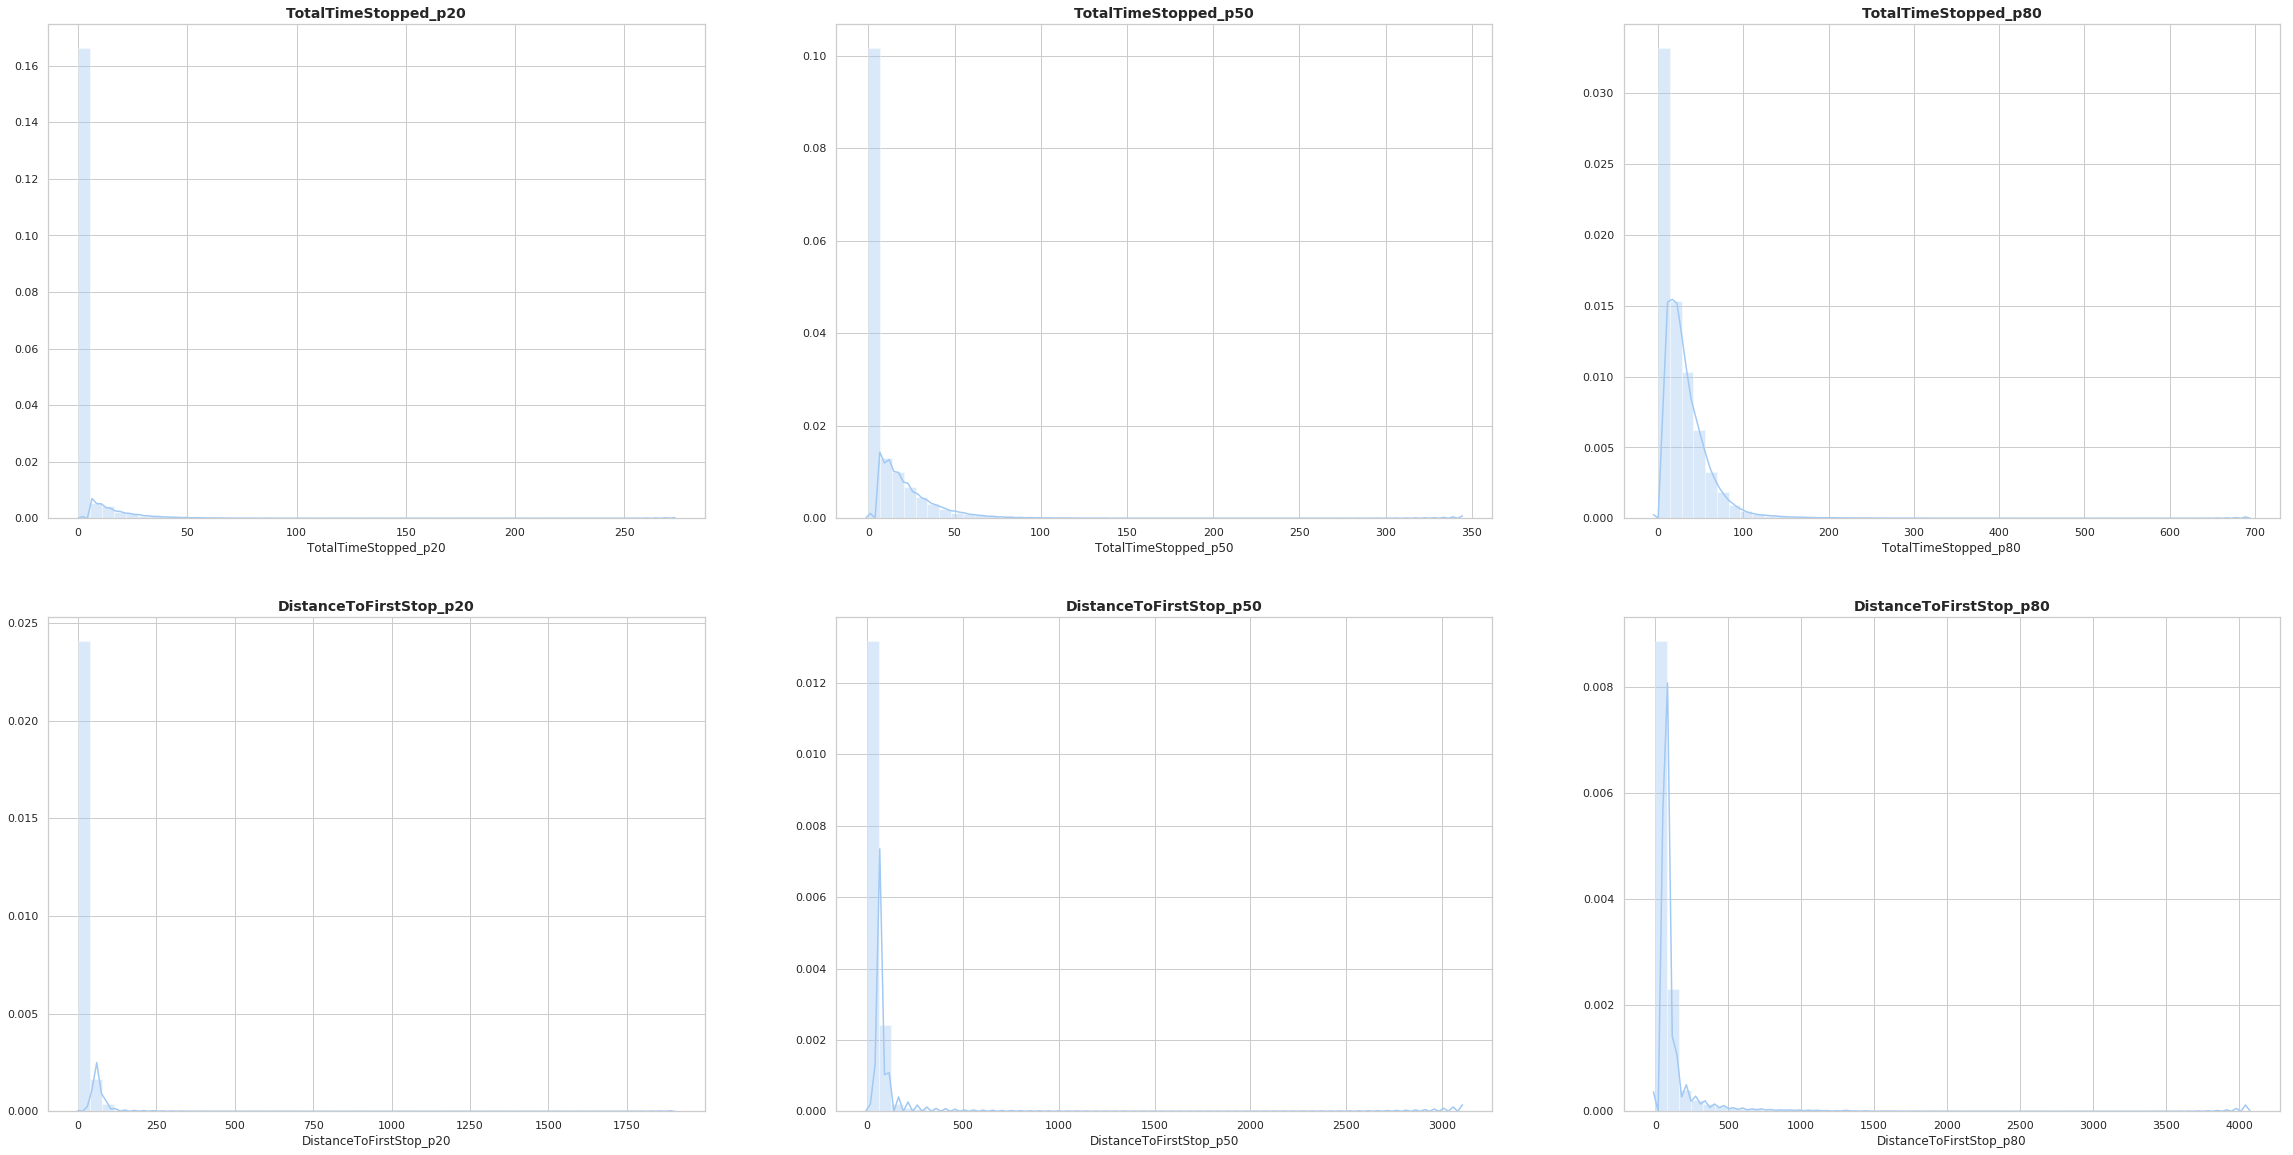

In [54]:
f, axs = plt.subplots(2, 3, figsize=(40, 20))

ax11=axs[0][0]
sns.distplot(train_table['TotalTimeStopped_p20'], ax=ax11);
ax11.set_title('TotalTimeStopped_p20', fontsize=14, weight='bold')

ax12=axs[0][1]
sns.distplot(train_table['TotalTimeStopped_p50'], ax=ax12);
ax12.set_title('TotalTimeStopped_p50', fontsize=14, weight='bold')

ax13=axs[0][2]
sns.distplot(train_table['TotalTimeStopped_p80'], ax=ax13);
ax13.set_title('TotalTimeStopped_p80', fontsize=14, weight='bold')


ax21=axs[1][0]
sns.distplot(train_table['DistanceToFirstStop_p20'], ax=ax21);
ax21.set_title('DistanceToFirstStop_p20', fontsize=14, weight='bold')

ax22=axs[1][1]
sns.distplot(train_table['DistanceToFirstStop_p50'], ax=ax22);
ax22.set_title('DistanceToFirstStop_p50', fontsize=14, weight='bold')

ax23=axs[1][2]
sns.distplot(train_table['DistanceToFirstStop_p80'], ax=ax23);
ax23.set_title('DistanceToFirstStop_p80', fontsize=14, weight='bold')



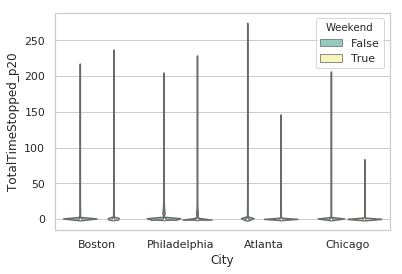

In [70]:
f, axs = plt.subplots(2, 3, figsize=(40, 20))

ax11=axs[0][0]
sns.violinplot(x='City', y='TotalTimeStopped_p20',
            hue="Weekend", palette="Set3",
            data=train_table, ax=ax11
           )
ax11.set_title('TotalTimeStopped_p20', fontsize=14, weight='bold')

ax12=axs[0][1]
sns.violinplot(x='City', y='TotalTimeStopped_p50',
            hue="Weekend", palette="Set3",
            data=train_table, ax=ax12
           )
ax12.set_title('TotalTimeStopped_p50', fontsize=14, weight='bold')

ax13=axs[0][2]
sns.violinplot(x='City', y='TotalTimeStopped_p80',
            hue="Weekend", palette="Set3",
            data=train_table, ax=ax13
           )
ax13.set_title('TotalTimeStopped_p80', fontsize=14, weight='bold')


ax21=axs[1][0]
sns.violinplot(x='City', y='DistanceToFirstStop_p20',
            hue="Weekend", palette="Set3",
            data=train_table, ax=ax21
           )
ax21.set_title('DistanceToFirstStop_p20', fontsize=14, weight='bold')

ax22=axs[1][1]
sns.violinplot(x='City', y='DistanceToFirstStop_p50',
            hue="Weekend", palette="Set3",
            data=train_table, ax=ax22
           )
ax22.set_title('DistanceToFirstStop_p50', fontsize=14, weight='bold')

ax23=axs[1][2]
sns.violinplot(x='City', y='DistanceToFirstStop_p80',
            hue="Weekend", palette="Set3",
            data=train_table, ax=ax23
           )
ax23.set_title('DistanceToFirstStop_p80', fontsize=14, weight='bold')





**ML Model v1**
* One-hot encoding of City, Weekend and Direction

*Score: 79.487*

In [5]:
MODEL_NAME = "model_{name}"
PREDICTION_TABLE_NAME = "prediction_{name}"
FIELDS = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80',
          'DistanceToFirstStop_p20', 'DistanceToFirstStop_p50', 'DistanceToFirstStop_p80']

In [8]:
def create_models(target_field):
    
    model_name = MODEL_NAME.format(name=target_field)
    
    query = """
create or replace model `bqml_example.{pr_model_name}`
options (model_type='linear_reg', labels=['{pr_target_field}'],
        min_rel_progress=.005, learn_rate=.1, learn_rate_strategy='constant')
as    
select 
    IntersectionId, Latitude, Longitude,
       -------- direction
       if(EntryHeading='E' and ExitHeading='E', 1, 0) as direction_E_E,
        if(EntryHeading='E' and ExitHeading='N', 1, 0) as direction_E_N,
        if(EntryHeading='E' and ExitHeading='NE', 1, 0) as direction_E_NE,
        if(EntryHeading='E' and ExitHeading='NW', 1, 0) as direction_E_NW,
        if(EntryHeading='E' and ExitHeading='S', 1, 0) as direction_E_S,
        if(EntryHeading='E' and ExitHeading='SE', 1, 0) as direction_E_SE,
        if(EntryHeading='E' and ExitHeading='SW', 1, 0) as direction_E_SW,
        if(EntryHeading='E' and ExitHeading='W', 1, 0) as direction_E_W,
        if(EntryHeading='N' and ExitHeading='E', 1, 0) as direction_N_E,
        if(EntryHeading='N' and ExitHeading='N', 1, 0) as direction_N_N,
        if(EntryHeading='N' and ExitHeading='NE', 1, 0) as direction_N_NE,
        if(EntryHeading='N' and ExitHeading='NW', 1, 0) as direction_N_NW,
        if(EntryHeading='N' and ExitHeading='S', 1, 0) as direction_N_S,
        if(EntryHeading='N' and ExitHeading='SE', 1, 0) as direction_N_SE,
        if(EntryHeading='N' and ExitHeading='SW', 1, 0) as direction_N_SW,
        if(EntryHeading='N' and ExitHeading='W', 1, 0) as direction_N_W,
        if(EntryHeading='NE' and ExitHeading='E', 1, 0) as direction_NE_E,
        if(EntryHeading='NE' and ExitHeading='N', 1, 0) as direction_NE_N,
        if(EntryHeading='NE' and ExitHeading='NE', 1, 0) as direction_NE_NE,
        if(EntryHeading='NE' and ExitHeading='NW', 1, 0) as direction_NE_NW,
        if(EntryHeading='NE' and ExitHeading='S', 1, 0) as direction_NE_S,
        if(EntryHeading='NE' and ExitHeading='SE', 1, 0) as direction_NE_SE,
        if(EntryHeading='NE' and ExitHeading='SW', 1, 0) as direction_NE_SW,
        if(EntryHeading='NE' and ExitHeading='W', 1, 0) as direction_NE_W,
        if(EntryHeading='NW' and ExitHeading='E', 1, 0) as direction_NW_E,
        if(EntryHeading='NW' and ExitHeading='N', 1, 0) as direction_NW_N,
        if(EntryHeading='NW' and ExitHeading='NE', 1, 0) as direction_NW_NE,
        if(EntryHeading='NW' and ExitHeading='NW', 1, 0) as direction_NW_NW,
        if(EntryHeading='NW' and ExitHeading='S', 1, 0) as direction_NW_S,
        if(EntryHeading='NW' and ExitHeading='SE', 1, 0) as direction_NW_SE,
        if(EntryHeading='NW' and ExitHeading='SW', 1, 0) as direction_NW_SW,
        if(EntryHeading='NW' and ExitHeading='W', 1, 0) as direction_NW_W,
        if(EntryHeading='S' and ExitHeading='E', 1, 0) as direction_S_E,
        if(EntryHeading='S' and ExitHeading='N', 1, 0) as direction_S_N,
        if(EntryHeading='S' and ExitHeading='NE', 1, 0) as direction_S_NE,
        if(EntryHeading='S' and ExitHeading='NW', 1, 0) as direction_S_NW,
        if(EntryHeading='S' and ExitHeading='S', 1, 0) as direction_S_S,
        if(EntryHeading='S' and ExitHeading='SE', 1, 0) as direction_S_SE,
        if(EntryHeading='S' and ExitHeading='SW', 1, 0) as direction_S_SW,
        if(EntryHeading='S' and ExitHeading='W', 1, 0) as direction_S_W,
        if(EntryHeading='SE' and ExitHeading='E', 1, 0) as direction_SE_E,
        if(EntryHeading='SE' and ExitHeading='N', 1, 0) as direction_SE_N,
        if(EntryHeading='SE' and ExitHeading='NE', 1, 0) as direction_SE_NE,
        if(EntryHeading='SE' and ExitHeading='NW', 1, 0) as direction_SE_NW,
        if(EntryHeading='SE' and ExitHeading='S', 1, 0) as direction_SE_S,
        if(EntryHeading='SE' and ExitHeading='SE', 1, 0) as direction_SE_SE,
        if(EntryHeading='SE' and ExitHeading='SW', 1, 0) as direction_SE_SW,
        if(EntryHeading='SE' and ExitHeading='W', 1, 0) as direction_SE_W,
        if(EntryHeading='SW' and ExitHeading='E', 1, 0) as direction_SW_E,
        if(EntryHeading='SW' and ExitHeading='N', 1, 0) as direction_SW_N,
        if(EntryHeading='SW' and ExitHeading='NE', 1, 0) as direction_SW_NE,
        if(EntryHeading='SW' and ExitHeading='NW', 1, 0) as direction_SW_NW,
        if(EntryHeading='SW' and ExitHeading='S', 1, 0) as direction_SW_S,
        if(EntryHeading='SW' and ExitHeading='SE', 1, 0) as direction_SW_SE,
        if(EntryHeading='SW' and ExitHeading='SW', 1, 0) as direction_SW_SW,
        if(EntryHeading='SW' and ExitHeading='W', 1, 0) as direction_SW_W,
        if(EntryHeading='W' and ExitHeading='E', 1, 0) as direction_W_E,
        if(EntryHeading='W' and ExitHeading='N', 1, 0) as direction_W_N,
        if(EntryHeading='W' and ExitHeading='NE', 1, 0) as direction_W_NE,
        if(EntryHeading='W' and ExitHeading='NW', 1, 0) as direction_W_NW,
        if(EntryHeading='W' and ExitHeading='S', 1, 0) as direction_W_S,
        if(EntryHeading='W' and ExitHeading='SE', 1, 0) as direction_W_SE,
        if(EntryHeading='W' and ExitHeading='SW', 1, 0) as direction_W_SW,
        if(EntryHeading='W' and ExitHeading='W', 1, 0) as direction_W_W,
       ----
       Hour, 
       if(Weekend is true, 1, 0) as Weekend,
       Month,
       if(City="Boston", 1, 0) as city_Boston,
       if(City="Philadelphia", 1, 0) as city_Philadelphia,
       if(City="Atlanta", 1, 0) as city_Atlanta,
       if(City="Chicago", 1, 0) as city_Chicago,
       ---- Targer
       {pr_target_field}
from `kaggle-competition-datasets.geotab_intersection_congestion.train`    
    """.format(pr_target_field=target_field,
               pr_model_name=model_name)
#     print(query)
    query_job = client.query(query,
                             location="US",) 
    
    results = query_job.result() 
    
    print("[Model][Done] Field: {} ".format(target_field), results)

In [9]:
def create_prediction(target_field):
    
    model_name = MODEL_NAME.format(name=target_field)
    table_name = PREDICTION_TABLE_NAME.format(name=target_field)
    query = """
create or replace table `bqml_example.{pr_table_name}` as
select
  RowId,
  predicted_{pr_target_field} as {pr_target_field}
from
  ML.PREDICT(MODEL `bqml_example.{pr_model_name}`,
    (
    SELECT  RowId,
            IntersectionId, Latitude, Longitude,
           -------- direction
           if(EntryHeading='E' and ExitHeading='E', 1, 0) as direction_E_E,
            if(EntryHeading='E' and ExitHeading='N', 1, 0) as direction_E_N,
            if(EntryHeading='E' and ExitHeading='NE', 1, 0) as direction_E_NE,
            if(EntryHeading='E' and ExitHeading='NW', 1, 0) as direction_E_NW,
            if(EntryHeading='E' and ExitHeading='S', 1, 0) as direction_E_S,
            if(EntryHeading='E' and ExitHeading='SE', 1, 0) as direction_E_SE,
            if(EntryHeading='E' and ExitHeading='SW', 1, 0) as direction_E_SW,
            if(EntryHeading='E' and ExitHeading='W', 1, 0) as direction_E_W,
            if(EntryHeading='N' and ExitHeading='E', 1, 0) as direction_N_E,
            if(EntryHeading='N' and ExitHeading='N', 1, 0) as direction_N_N,
            if(EntryHeading='N' and ExitHeading='NE', 1, 0) as direction_N_NE,
            if(EntryHeading='N' and ExitHeading='NW', 1, 0) as direction_N_NW,
            if(EntryHeading='N' and ExitHeading='S', 1, 0) as direction_N_S,
            if(EntryHeading='N' and ExitHeading='SE', 1, 0) as direction_N_SE,
            if(EntryHeading='N' and ExitHeading='SW', 1, 0) as direction_N_SW,
            if(EntryHeading='N' and ExitHeading='W', 1, 0) as direction_N_W,
            if(EntryHeading='NE' and ExitHeading='E', 1, 0) as direction_NE_E,
            if(EntryHeading='NE' and ExitHeading='N', 1, 0) as direction_NE_N,
            if(EntryHeading='NE' and ExitHeading='NE', 1, 0) as direction_NE_NE,
            if(EntryHeading='NE' and ExitHeading='NW', 1, 0) as direction_NE_NW,
            if(EntryHeading='NE' and ExitHeading='S', 1, 0) as direction_NE_S,
            if(EntryHeading='NE' and ExitHeading='SE', 1, 0) as direction_NE_SE,
            if(EntryHeading='NE' and ExitHeading='SW', 1, 0) as direction_NE_SW,
            if(EntryHeading='NE' and ExitHeading='W', 1, 0) as direction_NE_W,
            if(EntryHeading='NW' and ExitHeading='E', 1, 0) as direction_NW_E,
            if(EntryHeading='NW' and ExitHeading='N', 1, 0) as direction_NW_N,
            if(EntryHeading='NW' and ExitHeading='NE', 1, 0) as direction_NW_NE,
            if(EntryHeading='NW' and ExitHeading='NW', 1, 0) as direction_NW_NW,
            if(EntryHeading='NW' and ExitHeading='S', 1, 0) as direction_NW_S,
            if(EntryHeading='NW' and ExitHeading='SE', 1, 0) as direction_NW_SE,
            if(EntryHeading='NW' and ExitHeading='SW', 1, 0) as direction_NW_SW,
            if(EntryHeading='NW' and ExitHeading='W', 1, 0) as direction_NW_W,
            if(EntryHeading='S' and ExitHeading='E', 1, 0) as direction_S_E,
            if(EntryHeading='S' and ExitHeading='N', 1, 0) as direction_S_N,
            if(EntryHeading='S' and ExitHeading='NE', 1, 0) as direction_S_NE,
            if(EntryHeading='S' and ExitHeading='NW', 1, 0) as direction_S_NW,
            if(EntryHeading='S' and ExitHeading='S', 1, 0) as direction_S_S,
            if(EntryHeading='S' and ExitHeading='SE', 1, 0) as direction_S_SE,
            if(EntryHeading='S' and ExitHeading='SW', 1, 0) as direction_S_SW,
            if(EntryHeading='S' and ExitHeading='W', 1, 0) as direction_S_W,
            if(EntryHeading='SE' and ExitHeading='E', 1, 0) as direction_SE_E,
            if(EntryHeading='SE' and ExitHeading='N', 1, 0) as direction_SE_N,
            if(EntryHeading='SE' and ExitHeading='NE', 1, 0) as direction_SE_NE,
            if(EntryHeading='SE' and ExitHeading='NW', 1, 0) as direction_SE_NW,
            if(EntryHeading='SE' and ExitHeading='S', 1, 0) as direction_SE_S,
            if(EntryHeading='SE' and ExitHeading='SE', 1, 0) as direction_SE_SE,
            if(EntryHeading='SE' and ExitHeading='SW', 1, 0) as direction_SE_SW,
            if(EntryHeading='SE' and ExitHeading='W', 1, 0) as direction_SE_W,
            if(EntryHeading='SW' and ExitHeading='E', 1, 0) as direction_SW_E,
            if(EntryHeading='SW' and ExitHeading='N', 1, 0) as direction_SW_N,
            if(EntryHeading='SW' and ExitHeading='NE', 1, 0) as direction_SW_NE,
            if(EntryHeading='SW' and ExitHeading='NW', 1, 0) as direction_SW_NW,
            if(EntryHeading='SW' and ExitHeading='S', 1, 0) as direction_SW_S,
            if(EntryHeading='SW' and ExitHeading='SE', 1, 0) as direction_SW_SE,
            if(EntryHeading='SW' and ExitHeading='SW', 1, 0) as direction_SW_SW,
            if(EntryHeading='SW' and ExitHeading='W', 1, 0) as direction_SW_W,
            if(EntryHeading='W' and ExitHeading='E', 1, 0) as direction_W_E,
            if(EntryHeading='W' and ExitHeading='N', 1, 0) as direction_W_N,
            if(EntryHeading='W' and ExitHeading='NE', 1, 0) as direction_W_NE,
            if(EntryHeading='W' and ExitHeading='NW', 1, 0) as direction_W_NW,
            if(EntryHeading='W' and ExitHeading='S', 1, 0) as direction_W_S,
            if(EntryHeading='W' and ExitHeading='SE', 1, 0) as direction_W_SE,
            if(EntryHeading='W' and ExitHeading='SW', 1, 0) as direction_W_SW,
            if(EntryHeading='W' and ExitHeading='W', 1, 0) as direction_W_W,
           ----
           Hour, 
           if(Weekend is true, 1, 0) as Weekend,
           Month,
           if(City="Boston", 1, 0) as city_Boston,
           if(City="Philadelphia", 1, 0) as city_Philadelphia,
           if(City="Atlanta", 1, 0) as city_Atlanta,
           if(City="Chicago", 1, 0) as city_Chicago
    FROM `kaggle-competition-datasets.geotab_intersection_congestion.test`))    
    """.format(pr_target_field=target_field,
               pr_model_name=model_name,
               pr_table_name=table_name)
#     print(query)
    query_job = client.query(query,
                             location="US",) 
    
    results = query_job.result() 
    
    print("[Prediction][Done] Field: {} ".format(target_field), results)  

**Create models and table prediction**

In [10]:
for fld in FIELDS:
    # Model v1
    create_models(fld)
    create_prediction(fld)

[Prediction][Done] Field: TotalTimeStopped_p20  <google.cloud.bigquery.table._EmptyRowIterator object at 0x7efbccac0d68>
[Prediction][Done] Field: TotalTimeStopped_p50  <google.cloud.bigquery.table._EmptyRowIterator object at 0x7efbccadc358>
[Prediction][Done] Field: TotalTimeStopped_p80  <google.cloud.bigquery.table._EmptyRowIterator object at 0x7efbcd15b198>
[Prediction][Done] Field: DistanceToFirstStop_p20  <google.cloud.bigquery.table._EmptyRowIterator object at 0x7efbccadc978>
[Prediction][Done] Field: DistanceToFirstStop_p50  <google.cloud.bigquery.table._EmptyRowIterator object at 0x7efbcca4e6d8>
[Prediction][Done] Field: DistanceToFirstStop_p80  <google.cloud.bigquery.table._EmptyRowIterator object at 0x7efbccae4e10>


**Create submission file**

In [15]:
for fld in FIELDS:
    print("{}\t[model] {}\t[table_prediction] {}".format(fld, 
                                                             MODEL_NAME.format(name=fld),
                                                             PREDICTION_TABLE_NAME.format(name=fld)))
    

TotalTimeStopped_p20	[model] model_TotalTimeStopped_p20	[table_prediction] prediction_TotalTimeStopped_p20
TotalTimeStopped_p50	[model] model_TotalTimeStopped_p50	[table_prediction] prediction_TotalTimeStopped_p50
TotalTimeStopped_p80	[model] model_TotalTimeStopped_p80	[table_prediction] prediction_TotalTimeStopped_p80
DistanceToFirstStop_p20	[model] model_DistanceToFirstStop_p20	[table_prediction] prediction_DistanceToFirstStop_p20
DistanceToFirstStop_p50	[model] model_DistanceToFirstStop_p50	[table_prediction] prediction_DistanceToFirstStop_p50
DistanceToFirstStop_p80	[model] model_DistanceToFirstStop_p80	[table_prediction] prediction_DistanceToFirstStop_p80


In [21]:
prediction_TotalTimeStopped_p20 = client.list_rows('bqml_example.prediction_TotalTimeStopped_p20')
print("[prediction_TotalTimeStopped_p20] Total rows: {}".format(prediction_TotalTimeStopped_p20.total_rows))
df_prediction_TotalTimeStopped_p20 = prediction_TotalTimeStopped_p20.to_dataframe()
df_prediction_TotalTimeStopped_p20['RowId'] = df_prediction_TotalTimeStopped_p20['RowId'].apply(str) + '_0'
df_prediction_TotalTimeStopped_p20.rename(columns={'RowId': 'TargetId', 'TotalTimeStopped_p20': 'Target'}, inplace=True)


prediction_TotalTimeStopped_p50 = client.list_rows('bqml_example.prediction_TotalTimeStopped_p50')
print("[prediction_TotalTimeStopped_p50] Total rows: {}".format(prediction_TotalTimeStopped_p50.total_rows))
df_prediction_TotalTimeStopped_p50 = prediction_TotalTimeStopped_p50.to_dataframe()
df_prediction_TotalTimeStopped_p50['RowId'] = df_prediction_TotalTimeStopped_p50['RowId'].apply(str) + '_1'
df_prediction_TotalTimeStopped_p50.rename(columns={'RowId': 'TargetId', 'TotalTimeStopped_p50': 'Target'}, inplace=True)


prediction_TotalTimeStopped_p80 = client.list_rows('bqml_example.prediction_TotalTimeStopped_p80')
print("[prediction_TotalTimeStopped_p80] Total rows: {}".format(prediction_TotalTimeStopped_p80.total_rows))
df_prediction_TotalTimeStopped_p80 = prediction_TotalTimeStopped_p80.to_dataframe()
df_prediction_TotalTimeStopped_p80['RowId'] = df_prediction_TotalTimeStopped_p80['RowId'].apply(str) + '_2'
df_prediction_TotalTimeStopped_p80.rename(columns={'RowId': 'TargetId', 'TotalTimeStopped_p80': 'Target'}, inplace=True)



prediction_DistanceToFirstStop_p20 = client.list_rows('bqml_example.prediction_DistanceToFirstStop_p20')
print("[prediction_DistanceToFirstStop_p20] Total rows: {}".format(prediction_DistanceToFirstStop_p20.total_rows))
df_prediction_DistanceToFirstStop_p20 = prediction_DistanceToFirstStop_p20.to_dataframe()
df_prediction_DistanceToFirstStop_p20['RowId'] = df_prediction_DistanceToFirstStop_p20['RowId'].apply(str) + '_3'
df_prediction_DistanceToFirstStop_p20.rename(columns={'RowId': 'TargetId', 'DistanceToFirstStop_p20': 'Target'}, inplace=True)


prediction_DistanceToFirstStop_p50 = client.list_rows('bqml_example.prediction_DistanceToFirstStop_p50')
print("[prediction_DistanceToFirstStop_p50] Total rows: {}".format(prediction_DistanceToFirstStop_p50.total_rows))
df_prediction_DistanceToFirstStop_p50 = prediction_DistanceToFirstStop_p50.to_dataframe()
df_prediction_DistanceToFirstStop_p50['RowId'] = df_prediction_DistanceToFirstStop_p50['RowId'].apply(str) + '_4'
df_prediction_DistanceToFirstStop_p50.rename(columns={'RowId': 'TargetId', 'DistanceToFirstStop_p50': 'Target'}, inplace=True)


prediction_DistanceToFirstStop_p80 = client.list_rows('bqml_example.prediction_DistanceToFirstStop_p80')
print("[prediction_DistanceToFirstStop_p80] Total rows: {}".format(prediction_DistanceToFirstStop_p80.total_rows))
df_prediction_DistanceToFirstStop_p80 = prediction_DistanceToFirstStop_p80.to_dataframe()
df_prediction_DistanceToFirstStop_p80['RowId'] = df_prediction_DistanceToFirstStop_p80['RowId'].apply(str) + '_5'
df_prediction_DistanceToFirstStop_p80.rename(columns={'RowId': 'TargetId', 'DistanceToFirstStop_p80': 'Target'}, inplace=True)


[prediction_DistanceToFirstStop_p50] Total rows: 1920335


In [22]:
df = pd.concat([df_prediction_TotalTimeStopped_p20, df_prediction_TotalTimeStopped_p50, df_prediction_TotalTimeStopped_p80, 
                df_prediction_DistanceToFirstStop_p20, df_prediction_DistanceToFirstStop_p50, df_prediction_DistanceToFirstStop_p80], axis=0)
df.rename(columns={'RowId': 'TargetId'}, inplace=True)

In [23]:
df_fixed = df.sort_values(by=['TargetId'])

In [24]:
df_fixed.head()

,TargetId,Target
73975,0_0,5.257761
1226984,0_1,20.576220
650334,0_2,48.213474
73975,0_3,16.195842
574028,0_4,52.152237


In [25]:
df_fixed.to_csv('submission.csv', index=False)